# Averrage Fitlering Using Loops
Do not use this as this is inefficient and does not work for any kernel in gerneral due not doing a propper convertion to uint8.

True

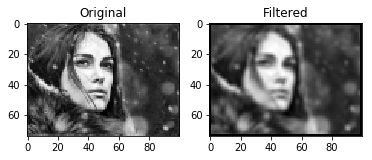

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())         
    return result
    
img = cv.imread('../images/keira.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)

# Averaging Using Filt2D

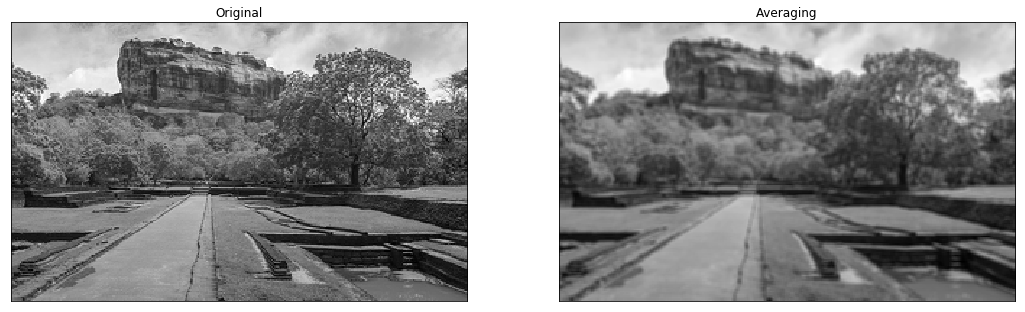

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Averaging
kernel = np.ones((3,3),np.float32)/9
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Sobel Vertical

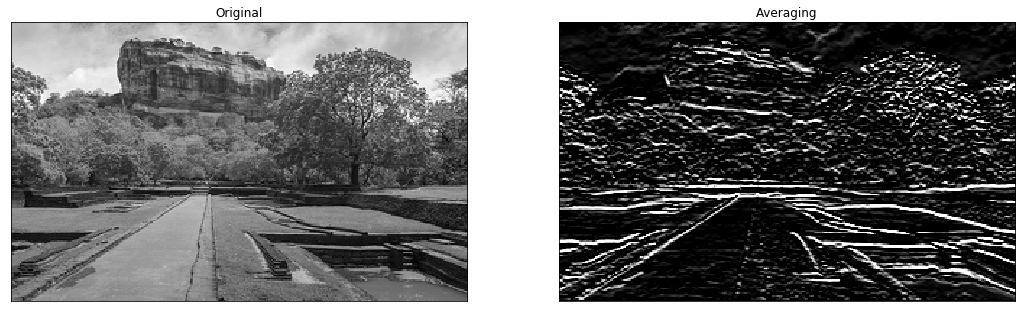

In [4]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [ ]:
# Sobel Horiontal

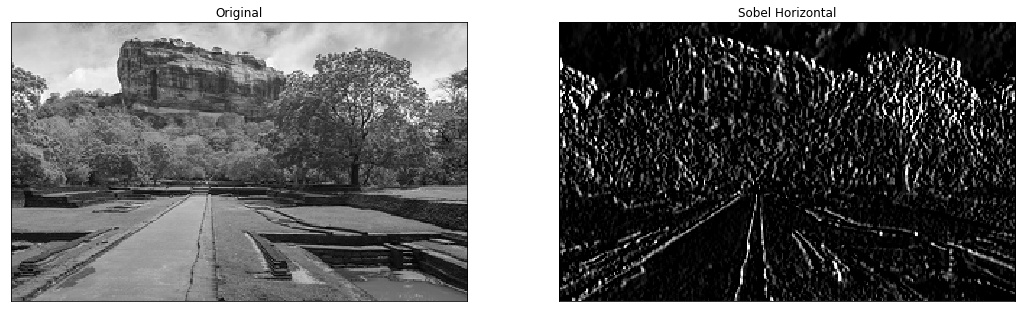

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)


# Sobel horizontal
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Border Effect

(113, 113)
(135, 135)
(135, 135)


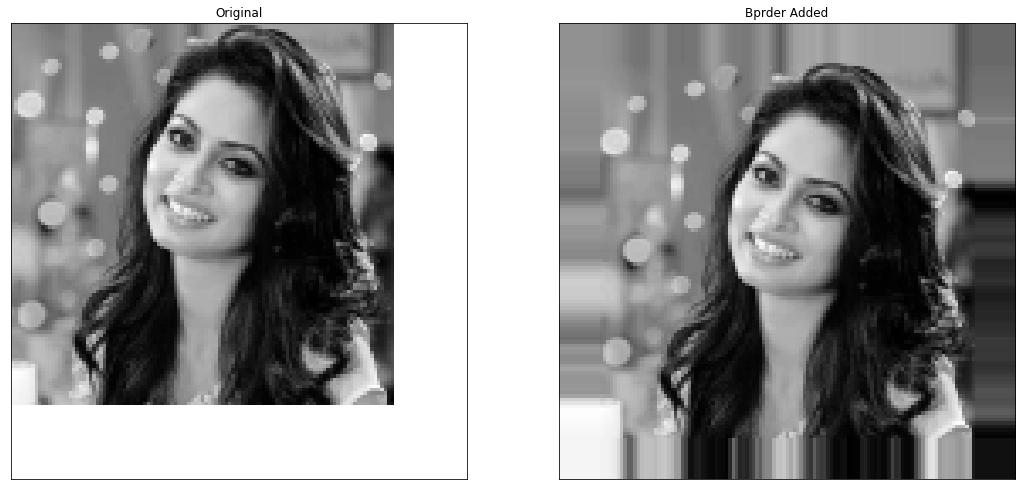

In [7]:
# Border Effect
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('../images/puja.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)

sigma = 1
kernel = cv.getGaussianKernel(11, sigma)
b = 11
dst = cv.copyMakeBorder(img, top = b, bottom = b, left = b, right = b, borderType=cv.BORDER_REPLICATE)

result = cv.sepFilter2D(dst, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
print(img.shape)
print(dst.shape)
print(result.shape)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Bprder Added')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


# Sharpening
125 added to the img - smoothed when displaying

DescribeResult(nobs=84135, minmax=(-91.0, 73.0), mean=-0.00342307, variance=36.269848, skewness=-0.4861440360546112, kurtosis=27.655990958834177)


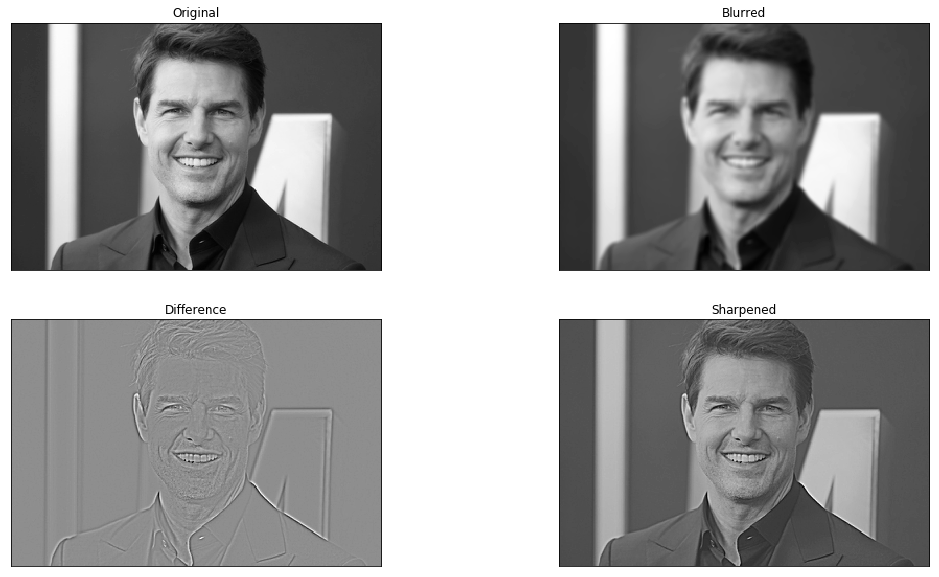

In [81]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('../images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))


# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_original.jpg', img)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_blurred.jpg', blurred)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_diff.jpg', diff + 125)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_sharpened.jpg', sharpened)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/tom_unsharp.jpg')
plt.show()


# Smoothign with Box Filter

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


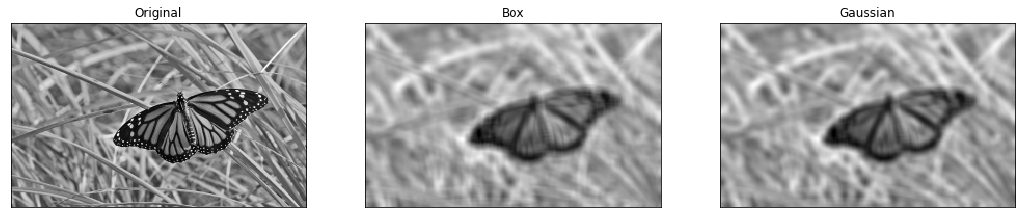

In [23]:
#  Box filer
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

img = cv.imread('../images/butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

# Box filter
box = 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box)


# Box filter
gaus = cv.getGaussianKernel(9, 4)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)


cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_original.jpg', img)
cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_box.jpg', imgb)
cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_gaussian.jpg', imgg)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Creatign a Gaussian Kernel

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

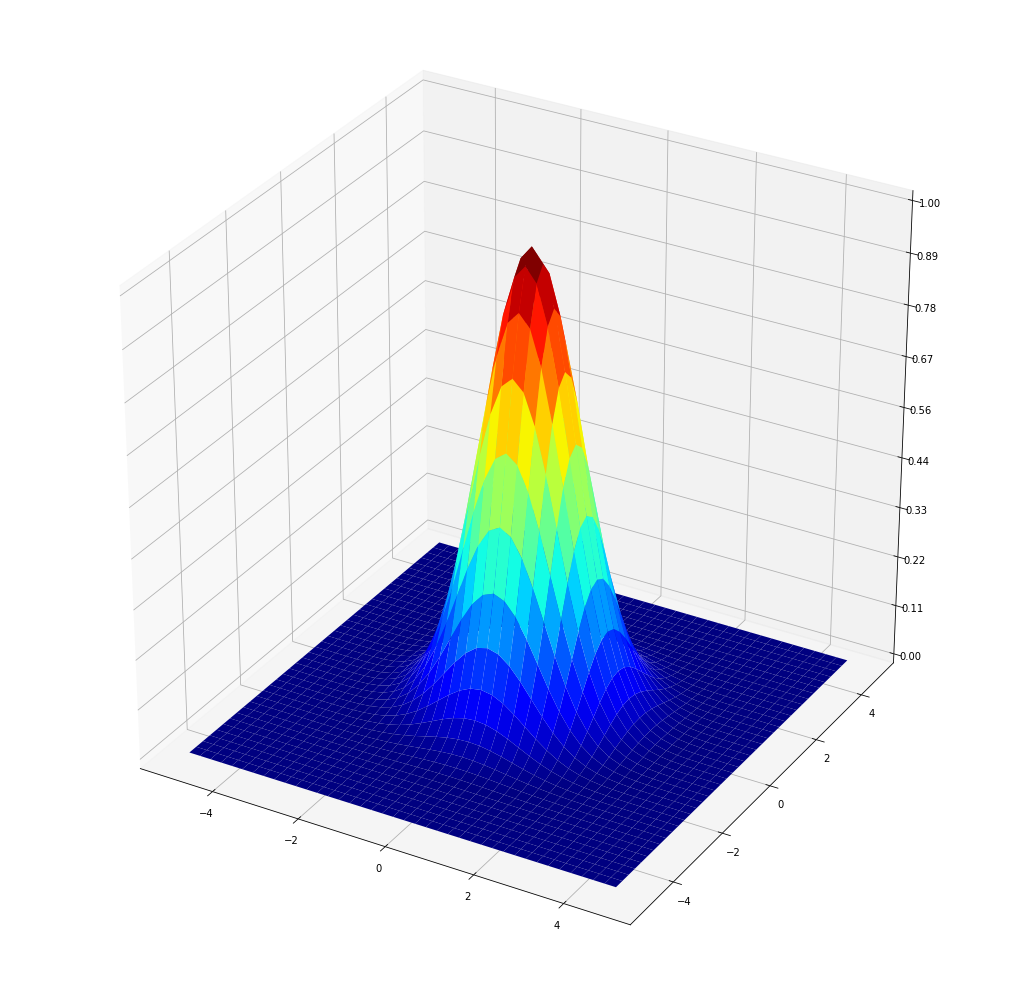

In [1]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/gaussian_2d_5.jpg')

plt.show()

# Gaussian Noise Filtering

uint8
255


c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


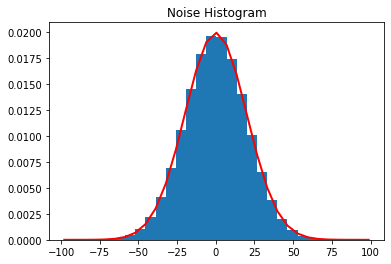

In [2]:
# Gaussian Noise Filtering
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('../images/gal.jpg', cv.IMREAD_COLOR)
print(img.dtype)
print(img.max())
mu = 0.0
sigma = 20
gauss = np.array(img.shape).astype('uint8')
h, w, c = img.shape
gauss = np.random.normal(mu,sigma, (h, w, c))
#gauss = gauss.reshape(h, w, c)
noisy = cv.add(img, gauss, dtype=cv.CV_8UC3)

count, bins, ignored = plt.hist(gauss.flatten(), 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Noise Histogram')
plt.show()

sigma = 5
kernel = cv.getGaussianKernel(11, sigma)
filtered = cv.sepFilter2D(noisy, -1, kernel, kernel)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", noisy)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow("Image", filtered.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

# Effect of $\sigma$

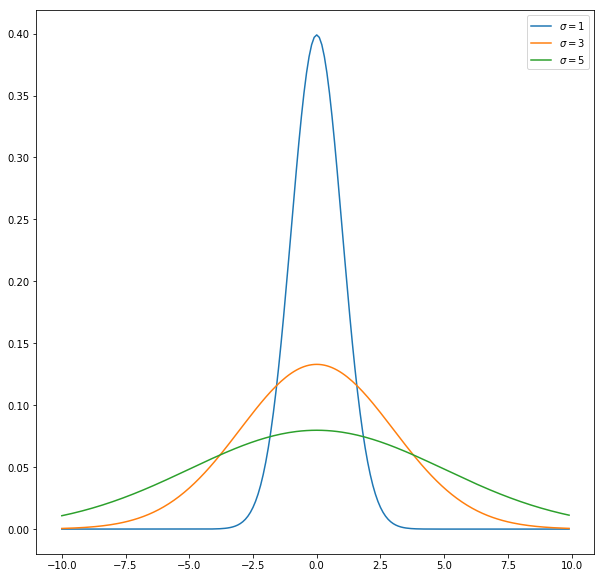

In [15]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import tikzplotlib

def g(x, mu, sigma):
    return 1./(sigma*np.sqrt(2.*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


x = np.arange(-10., 10., 0.1)
fig, ax  = plt.subplots(1,1, sharex='all', sharey='all', figsize=(10,10))
ax.plot(x, g(x, 0, 1), label='$\sigma=1$')
ax.plot(x, g(x, 0, 3), label='$\sigma=3$')
ax.plot(x, g(x, 0, 5), label='$\sigma=5$')
ax.legend()
tikzplotlib.save("../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/effect_of_sigma.tex")
plt.show()


# Noise

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
import numpy as np
from scipy import stats



def noisy(noise_typ,image):    
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                    n is uniform noise with specified mean & variance.
        
        Source: https://stackoverflow.com/a/30609854
    """    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p":
        # row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        return noisy
    
img = cv.imread('../images/gal.jpg', cv.IMREAD_COLOR)
imn =  noisy('s&p', img.astype('float32'))

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img)
cv.waitKey(0)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()


c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


# Effect of Gaussian Noise Level and Smoothing Level

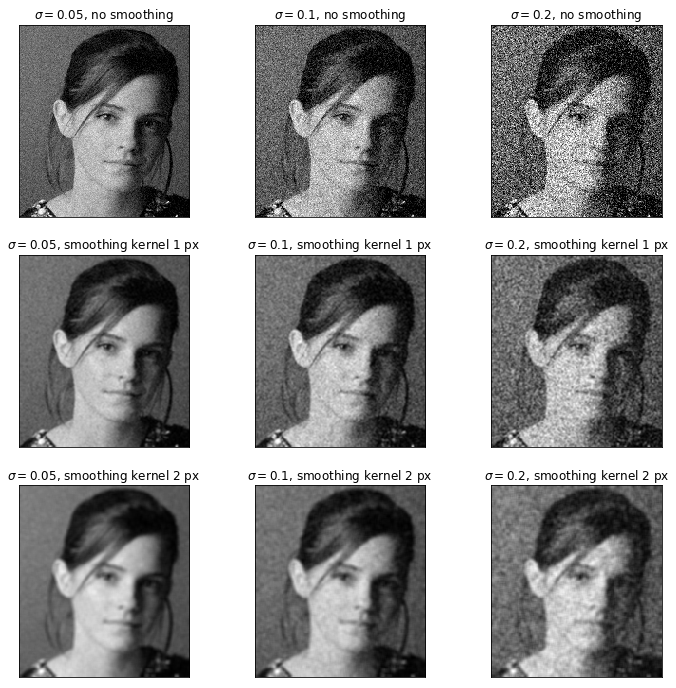

In [68]:
# Effect of Gaussian Kernel Size
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('../images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

        
mean = 0.
noise = [0.05, 0.1, 0.2]
sigma = [0, 1, 2]
sigma_text = ['no smoothing', 'smoothing kernel 1 px', 'smoothing kernel 2 px']
fig, axes  = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    for j in range(3):
        gauss = np.random.normal(mean,noise[i]*255., img.shape)
        gauss = gauss.reshape(img.shape)
        imn = img + gauss
        imn = np.clip(imn, 0.0, 255.0)
        ksize = sigma[j]*2+1
        if j != 0:
            imn = cv.GaussianBlur(imn, (ksize, ksize), sigmaX=sigma[j], sigmaY=sigma[j])
        
        axes[j,i].imshow(imn, cmap='gray')
        axes[j,i].set_title(r'$\sigma={0}$, {1}'.format(noise[i], sigma_text[j]))
        axes[j,i].set_xticks([]), axes[j,i].set_yticks([])
        
plt.savefig("../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/noise_level_and_smoothing.jpg", dpi=150, bbox_inches='tight')
plt.show()


# Failure of Gaussian Smoothing to Handle Salt and Pepper Noise

C:\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


[1.5 2.5 3.5]


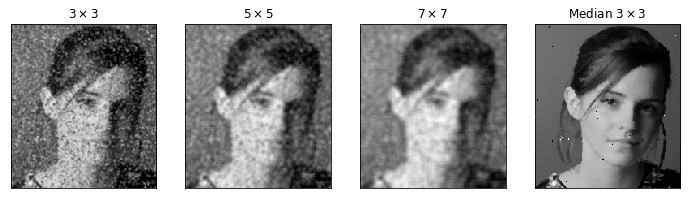

In [79]:
# Effect of Gaussian Kernel Size
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('../images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
imn =  noisy('s&p', img.astype('float32'))

ksize = np.array([3, 5, 7])
sigma = ksize/2.
print(sigma)
fig, axes  = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])        
    axes[i].imshow(imf, cmap='gray')
    axes[i].set_title(r'${0}\times {0}$'.format(ksize[i]))
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
imf = cv.medianBlur(imn, 3)    
axes[3].imshow(imf, cmap='gray')
axes[3].set_title(r'Median ${0}\times {0}$'.format(3))
axes[3].set_xticks([]), axes[i].set_yticks([])

plt.savefig("../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/s_and_p_with_gaussian.jpg", dpi=150, bbox_inches='tight')
plt.show()


# Median Filtering

In [7]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('../images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn =  noisy('s&p', img.astype('float32'))
imf = cv.medianBlur(imn, 5)

plt.hist(imn.ravel(), bins=256)
plt.title('Histogram of the Noisy Image')


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", imf.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'astype'

# Unsharp Mask Filter

(41, 41)


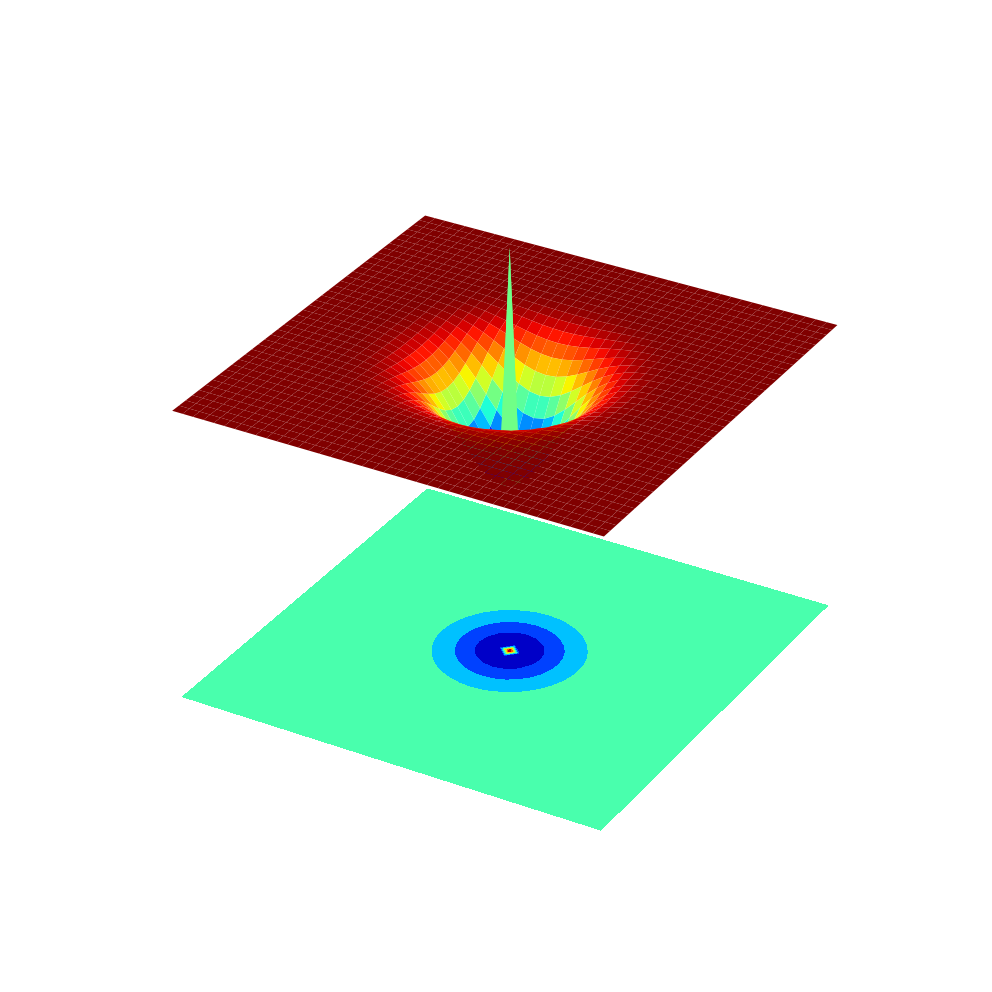

In [98]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
imp = np.zeros(Z.shape)
print(Z.shape)
imp[int(Z.shape[0]/2), int(Z.shape[1]/2)] = 2
Z = imp - Z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


plt.show()

In [ ]:
# Sharpenign Using Unsharp Marsking Filer

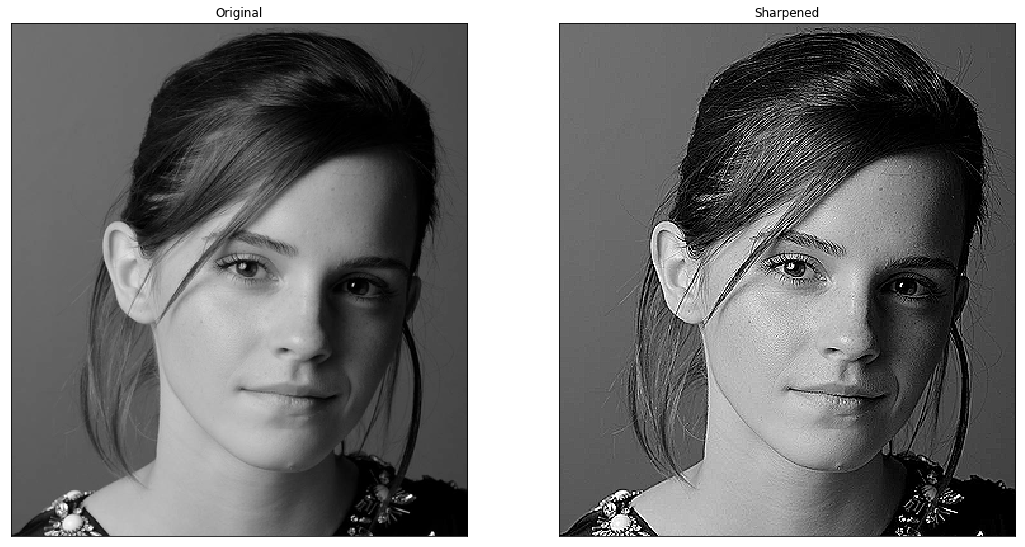

In [104]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()